In [2]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices())

2.15.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
(X_train, train_label), (X_test, test_label) = tf.keras.datasets.mnist.load_data() 

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')/255

X_mean = np.mean(X_train, axis=0)
X_train -= X_mean
X_test -= X_mean

Tr_labels = tf.keras.utils.to_categorical(train_label, 10)
Te_labels = tf.keras.utils.to_categorical(test_label, 10)

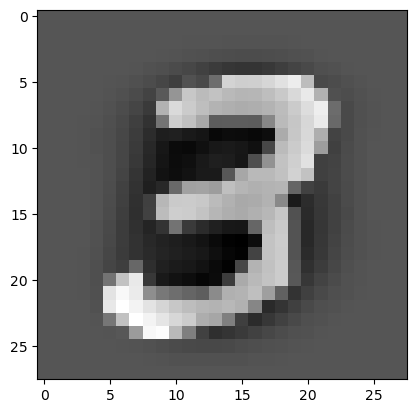

(28, 28, 1)


In [9]:
plt.imshow(X_train[7], cmap='gray')
plt.show()
print(X_train[7].shape)

In [11]:
# Modelling the CNN

model = tf.keras.models.Sequential()

# Input layer for images (28, 28, 1) => 1 representing the channel (grayscale)
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

# Adding convolutional layer
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'))

# Adding a max-pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

# Flattening the feature maps to a vector
model.add(tf.keras.layers.Flatten())

# Fully connected layers
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               270500    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 271670 (1.04 MB)
Trainable params: 271670 (1.04 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [16]:
history = tf.keras.callbacks.History()

model.fit(
    X_train, Tr_labels,
    batch_size=64,
    epochs=10,
    validation_split=0.1,
    callbacks=[history]
)

Epoch 1/10
844/844 [==============================] - 37s 43ms/step - loss: 0.3859 - accuracy: 0.9715 - val_loss: 0.4065 - val_accuracy: 0.9793
Epoch 2/10
844/844 [==============================] - 36s 43ms/step - loss: 0.5475 - accuracy: 0.9684 - val_loss: 0.7603 - val_accuracy: 0.9662
Epoch 3/10
844/844 [==============================] - 36s 42ms/step - loss: 0.6721 - accuracy: 0.9680 - val_loss: 1.0770 - val_accuracy: 0.9613
Epoch 4/10
844/844 [==============================] - 34s 41ms/step - loss: 0.8460 - accuracy: 0.9660 - val_loss: 0.8171 - val_accuracy: 0.9705
Epoch 5/10
844/844 [==============================] - 35s 41ms/step - loss: 0.9585 - accuracy: 0.9651 - val_loss: 1.2865 - val_accuracy: 0.9642
Epoch 6/10
844/844 [==============================] - 36s 42ms/step - loss: 1.2116 - accuracy: 0.9639 - val_loss: 1.4516 - val_accuracy: 0.9632
Epoch 7/10
844/844 [==============================] - 35s 41ms/step - loss: 1.2694 - accuracy: 0.9650 - val_loss: 1.5848 - val_accuracy:

In [17]:
score = model.evaluate(X_test, Te_labels)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 12s 38ms/step - loss: 2.8963 - accuracy: 0.9534
Test loss:  2.8962624073028564
Test accuracy:  0.9534000158309937


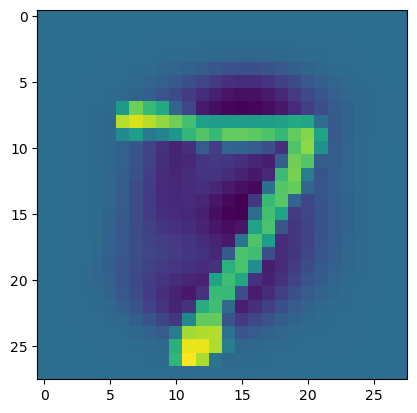

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
plt.imshow(X_test[0])
plt.show()
print(Te_labels[0])

In [29]:
prediction = model.predict(X_test[0, :].reshape((1, 28, 28, 1)))
print("Original: ", Te_labels[0])
print("Predicted: ", prediction[0])

1/1 [==============================] - 0s 10ms/step
Original:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [37]:
help(model.summary)

Help on method summary in module keras.src.engine.training:

summary(line_length=None, positions=None, print_fn=None, expand_nested=False, show_trainable=False, layer_range=None) method of keras.src.engine.sequential.Sequential instance
    Prints a string summary of the network.
    
    Args:
        line_length: Total length of printed lines
            (e.g. set this to adapt the display to different
            terminal window sizes).
        positions: Relative or absolute positions of log elements
            in each line. If not provided, becomes
            `[0.3, 0.6, 0.70, 1.]`. Defaults to `None`.
        print_fn: Print function to use. By default, prints to `stdout`.
            If `stdout` doesn't work in your environment, change to `print`.
            It will be called on each line of the summary.
            You can set it to a custom function
            in order to capture the string summary.
        expand_nested: Whether to expand the nested models.
            De